In [78]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data = pd.read_parquet(r'..\data\FAOSTAT\clean_data\all_tables_processed\full_country_dataset_v2_imputed.parquet')

In [80]:
# Select only country data
data = data[data['Area Code'] < 1000]

In [81]:
# Select emissions columns for clustering
emissions_columns = []

for col in data.columns:
    if 'mission' in col:
        emissions_columns.append(col)

In [82]:
grouped_data = data[emissions_columns+['Area']].groupby('Area').sum()
grouped_data

,Total_Energy_Emissions_(CO2)_kt,Cropland_organic_soils_Emissions_(CO2)_kt,Drained_organic_soils_Emissions_(CO2)_kt,Grassland_organic_soils_Emissions_(CO2)_kt,Forestland_Net_emissions/removals_(CO2)_(Forest_land)_kt,Net_Forest_conversion_Net_emissions/removals_(CO2)_(Forest_land)_kt,Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_x,Energy_Use_(Pre-_and_Post-Production)_Emissions_(CO2eq)_(AR5)_kt,Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x,Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt_x,...,Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_y,Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt,Savanna_fires_Emissions_(CO2eq)_(AR5)_kt,Synthetic_Fertilizers_Emissions_(CO2eq)_(AR5)_kt,Waste_Emissions_(CO2eq)_(AR5)_kt,Total_Energy_Emissions_(CH4_CO2eq)_kt,Total_Energy_Emissions_(N2O_CO2eq)_kt,Cropland_organic_soils_Emissions_(N2O_CO2eq)_kt,Drained_organic_soils_Emissions_(N2O_CO2eq)_kt,Grassland_organic_soils_Emissions_(N2O_CO2eq)_kt
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1337.8547,0.0000,0.0000,0.0000,-49248.9981,0.0000,73616.505478,26111.682737,965.396076,16842.664433,...,1.079596e+05,27252.1340,591.9051,8681.6915,136277.2476,93334.1724,3.2330,0.0000,0.0000,0.0000
Albania,15055.6824,4327.7992,4615.0286,287.2275,-17720.1178,0.0000,22477.646252,12557.682702,0.000000,2947.128684,...,3.739409e+04,302.4672,231.5640,8912.9040,17630.6988,51.3548,697.1885,808.9655,835.4390,26.3940
Algeria,15829.9043,0.0000,0.0000,0.0000,-33542.2731,19592.5831,316827.124683,676812.239809,34089.219556,481304.887949,...,1.009836e+06,113.8144,2163.3010,13124.3900,545886.6380,93339.6156,200.6845,0.0000,0.0000,0.0000
American Samoa,1382.5354,0.0000,0.0000,0.0000,-2236.9957,346.9384,81.865705,4597.142173,0.000000,33.511244,...,4.679008e+03,0.0000,0.0000,4.9820,0.0000,2.1644,141.4305,0.0000,0.0000,0.0000
Andorra,1442.1078,0.0000,0.0000,0.0000,0.0000,0.0000,616.406775,1661.258936,0.000000,111.767083,...,2.523368e+03,0.0000,0.0000,0.0000,1254.6810,3.7352,142.4375,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen Ar Rp,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Yemen Dem,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Yugoslav SFR,68845.2598,8505.9408,11596.1622,3090.2214,-455408.4066,16359.8022,83057.079475,78199.042050,0.000000,1397.080954,...,1.612561e+05,2864.1396,684.9402,78971.4840,255923.4305,96639.7292,176.7815,1589.3640,2114.7000,524.2230


Fitting data with 2 clusters
Fitting data with 3 clusters
Fitting data with 4 clusters
Fitting data with 5 clusters
Fitting data with 6 clusters
Fitting data with 7 clusters
Fitting data with 8 clusters
Fitting data with 9 clusters


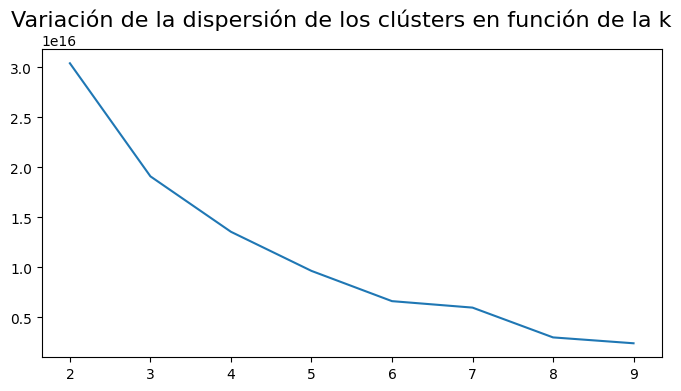

In [83]:
sse = {}

for k in range(2, 10):

    print(f"Fitting data with {k} clusters")

    kmeans = KMeans(n_clusters = k)
    kmeans.fit(grouped_data)

    sse[k] = kmeans.inertia_


fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

In [84]:
kmeans = KMeans(n_clusters=4, random_state=23).fit(grouped_data)
grouped_data['cluster'] = kmeans.labels_

In [85]:
area_to_cluster = grouped_data['cluster']

# Map cluster labels back to the initial data
data['cluster'] = data['Area'].map(area_to_cluster)

In [90]:
data2 = data.groupby('Area').mean()
data2

,Year,Area Code,Total_Energy_Emissions_(CO2)_kt,Total_Energy_Energy_use_in_agriculture_TJ,Cropland_organic_soils_Area_ha,Cropland_organic_soils_Emissions_(CO2)_kt,Cropland_organic_soils_Net_stock_change_(C)_kt,Drained_organic_soils_Area_ha,Drained_organic_soils_Emissions_(CO2)_kt,Drained_organic_soils_Net_stock_change_(C)_kt,...,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No,Gross_Domestic_Product_Annual_growth_US$_per_capita_%,Gross_Domestic_Product_Value_US$_million_USD,Gross_Domestic_Product_Value_US$_per_capita_USD,Total_Energy_Emissions_(CH4_CO2eq)_kt,Total_Energy_Emissions_(N2O_CO2eq)_kt,Cropland_organic_soils_Emissions_(N2O_CO2eq)_kt,Drained_organic_soils_Emissions_(N2O_CO2eq)_kt,Grassland_organic_soils_Emissions_(N2O_CO2eq)_kt,cluster
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2000.5,2.0,31.853683,251.228571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21524.205571,2.254464,8223.695395,339.505583,2222.242200,0.076976,0.000000,0.000000,0.000000,0.0
Albania,2000.5,3.0,358.468629,5091.190460,3684.892121,103.042838,28.102614,4042.310017,109.881633,29.967729,...,3076.282833,6.092678,6823.184106,2301.862985,1.222733,16.599726,19.261083,19.891405,0.628429,0.0
Algeria,2000.5,4.0,376.902483,3510.515817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,31114.559214,2.461695,98698.853552,2985.373169,2222.371800,4.778202,0.000000,0.000000,0.000000,0.0
American Samoa,2000.5,5.0,32.917510,444.230952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,49.955381,NaN,NaN,NaN,0.051533,3.367393,0.000000,0.000000,0.000000,0.0
Andorra,2000.5,6.0,34.335900,495.090295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.506095,3.109905,2067.813814,30230.411580,0.088933,3.391369,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen Ar Rp,2000.5,246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2468.988092,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Yemen Dem,2000.5,247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,472.680536,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Yugoslav SFR,2000.5,248.0,1639.172852,25527.939993,6991.567400,202.522400,55.233400,10565.308500,276.099100,75.299700,...,21870.542571,6.233931,89805.972581,4101.581563,2300.945933,4.209083,37.842000,50.350000,12.481500,0.0


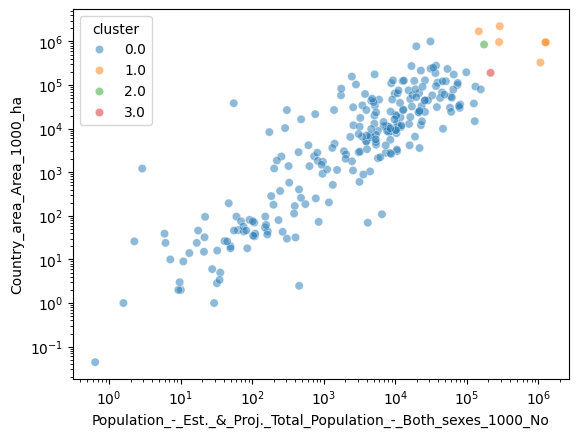

In [87]:
sns.scatterplot(data=data2, x='Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No',
                y='Country_area_Area_1000_ha',
                hue='cluster', alpha=0.5, palette='tab10')
plt.xscale('log')
plt.yscale('log')